In [93]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np
plt.rcParams['figure.figsize'] = [17, 17]

In [2]:
from harmony import ChromaticNecklace

In [64]:
G = nx.DiGraph()

In [65]:
init = ChromaticNecklace('major', 0)

In [66]:
edges, togo = [], [init]

In [67]:
while togo:
    current = togo.pop()
    for idx in range(12):
        if current.movable(idx):
            adjecent = current.move(idx)
            edge = (
                (current.name, current.color),
                (adjecent.name, adjecent.color)
            )
            if edge not in G.edges:
                G.add_edge(*edge, label=idx)
                togo.append(adjecent)

In [134]:
# Check different orderings
scales = ['harmonic_major', 'harmonic_minor', 'melodic_minor', 'major']
def layout(graph):
    nodes = graph.nodes
    theta = [(3 - n[1] + scales.index(n[0]) / ((np.sqrt(5)+1)/2)) * (np.pi / 6) for n in nodes]
    rad = [scales.index(n[0]) for n in nodes]
    rad =[r*2 + 5 for r in rad]
    return {n: (r * np.cos(t), r * np.sin(t)) for n, r, t in zip(nodes, rad, theta)}

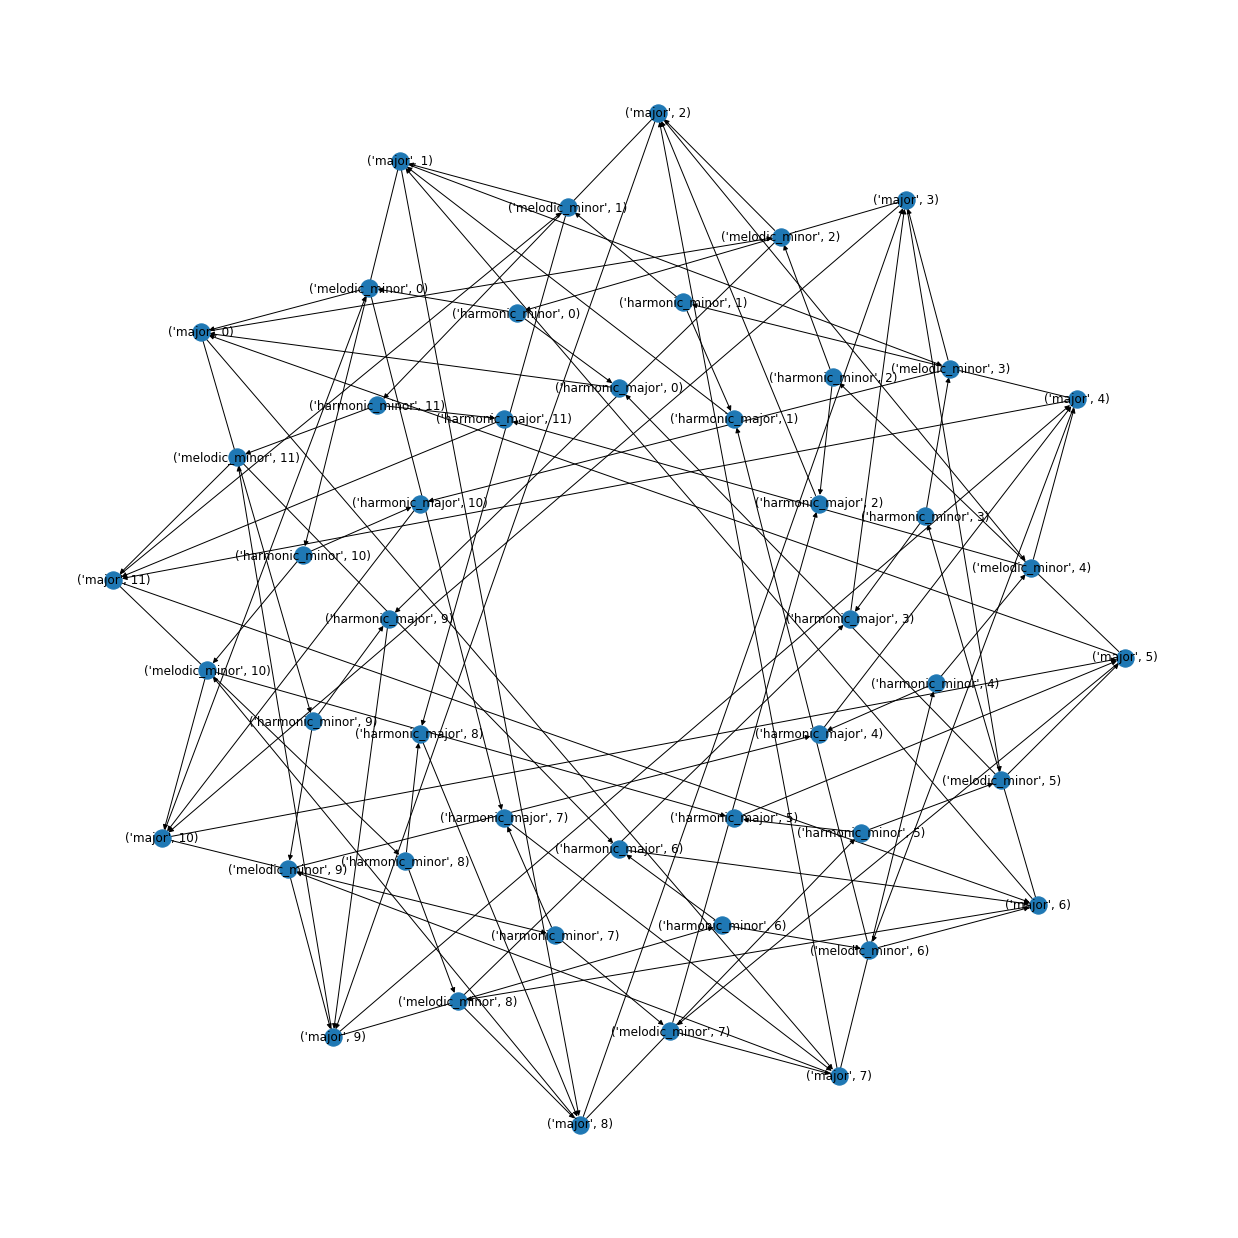

In [135]:
pos = layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [78]:
pred, dist = nx.dijkstra_predecessor_and_distance(G, ('major', 0))

In [79]:
dist

{('major', 0): 0,
 ('melodic_minor', 2): 1,
 ('major', 7): 1,
 ('harmonic_minor', 9): 1,
 ('major', 2): 2,
 ('harmonic_major', 9): 2,
 ('harmonic_minor', 4): 2,
 ('melodic_minor', 9): 2,
 ('melodic_minor', 4): 3,
 ('major', 9): 3,
 ('harmonic_minor', 11): 3,
 ('harmonic_major', 4): 3,
 ('major', 4): 4,
 ('harmonic_major', 11): 4,
 ('harmonic_minor', 6): 4,
 ('melodic_minor', 11): 4,
 ('melodic_minor', 6): 5,
 ('major', 11): 5,
 ('harmonic_minor', 1): 5,
 ('harmonic_major', 6): 5,
 ('major', 6): 6,
 ('harmonic_major', 1): 6,
 ('harmonic_minor', 8): 6,
 ('melodic_minor', 1): 6,
 ('harmonic_minor', 3): 7,
 ('melodic_minor', 8): 7,
 ('major', 1): 7,
 ('harmonic_major', 8): 7,
 ('harmonic_major', 3): 8,
 ('melodic_minor', 3): 8,
 ('major', 8): 8,
 ('harmonic_minor', 10): 8,
 ('major', 3): 9,
 ('harmonic_major', 10): 9,
 ('harmonic_minor', 5): 9,
 ('melodic_minor', 10): 9,
 ('melodic_minor', 5): 10,
 ('major', 10): 10,
 ('harmonic_minor', 0): 10,
 ('harmonic_major', 5): 10,
 ('major', 5): 11

In [61]:
paths = nx.shortest_paths.all_shortest_paths(G, ('major', 0), ('melodic_minor', 5))

In [62]:
for p in paths:
    print('=====================')
    print(p)

[('major', 0), ('major', 5), ('melodic_minor', 5)]
[('major', 0), ('harmonic_major', 0), ('melodic_minor', 5)]


In [1]:
from sympy.utilities.iterables import necklaces

maybe think about representing scale families with third intervals
either thirds from each step or stacked thirds

In [5]:
for n in necklaces(7, 2):
    if sum(n) == 3:
        print(n)

(0, 0, 0, 0, 1, 1, 1)
(0, 0, 0, 1, 0, 1, 1)
(0, 0, 0, 1, 1, 0, 1)
(0, 0, 1, 0, 0, 1, 1)
(0, 0, 1, 0, 1, 0, 1)
